<a href="https://colab.research.google.com/github/ajayjai30/BIOSIGNAL-ANALYSIS-FOR-SMOKING/blob/main/BIOSIGNAL_ANALYSIS_FOR_SMOKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import copy

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/smoking.csv')
df1=df.copy()
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [ ]:
df.oral.unique()

array(['Y'], dtype=object)

In [ ]:
df.tartar.unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df.shape

(55692, 27)

In [ ]:
df=df.drop(['oral','ID'],axis=1)

In [ ]:
#simple manual label encoding as there are two columns with only two unique values
df.gender=df.gender.replace(['M',"F"],[0,1])

In [ ]:
df.tartar=df.tartar.replace(['Y','N'],[1,0])

In [ ]:
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,1,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,0,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,0,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [ ]:
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,1,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,0,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,0,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [ ]:
df['AST'].dtype

dtype('float64')

In [ ]:
df.shape

(55692, 25)

In [ ]:
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [ ]:
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,1,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,0,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,0,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,1,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1,0
55688,1,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0
55689,1,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0
55690,0,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0


For Column: gender




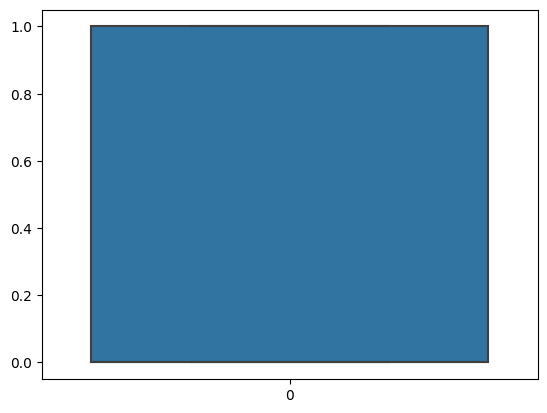

For Column: age




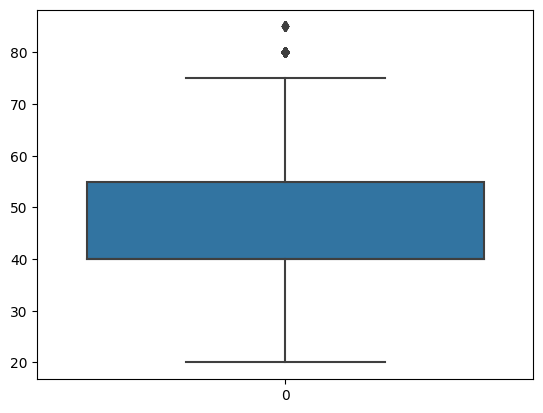

For Column: height(cm)




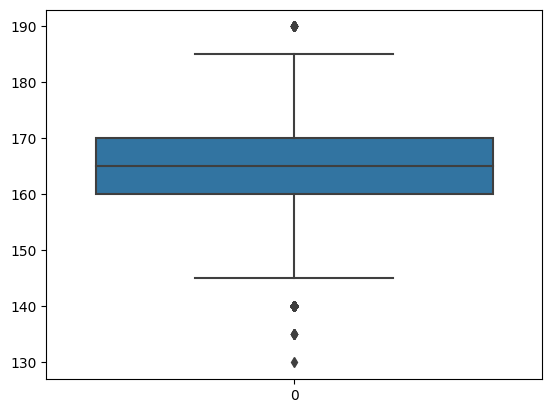

For Column: weight(kg)




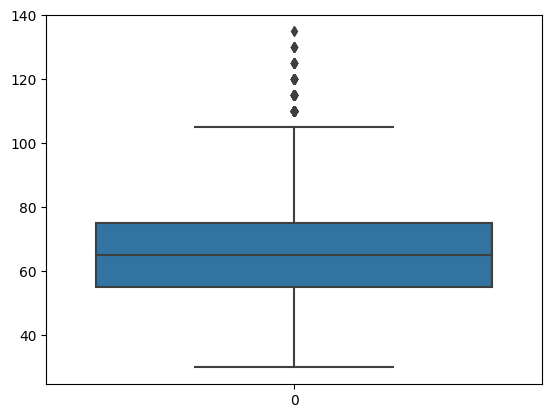

For Column: waist(cm)




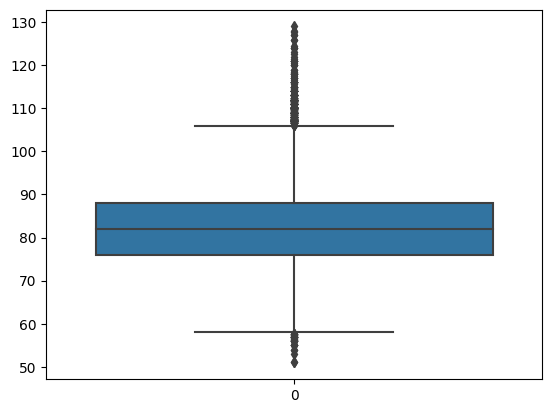

For Column: eyesight(left)




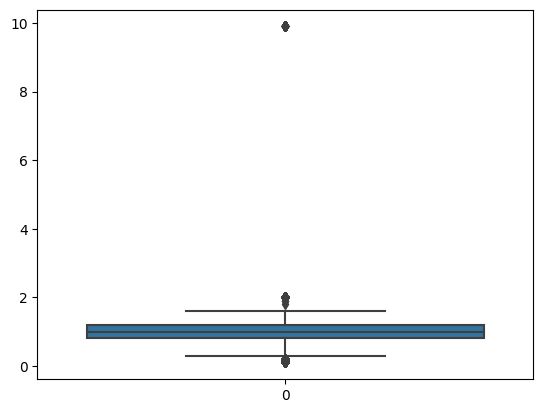

For Column: eyesight(right)




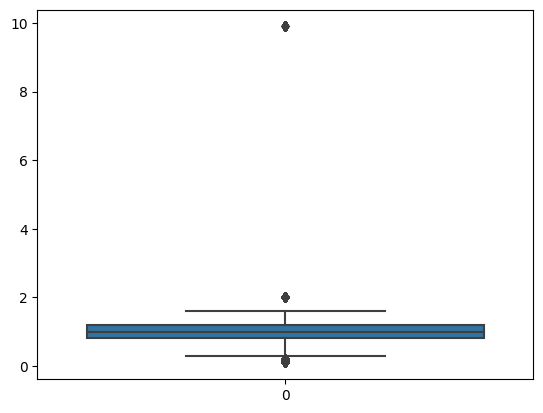

For Column: hearing(left)




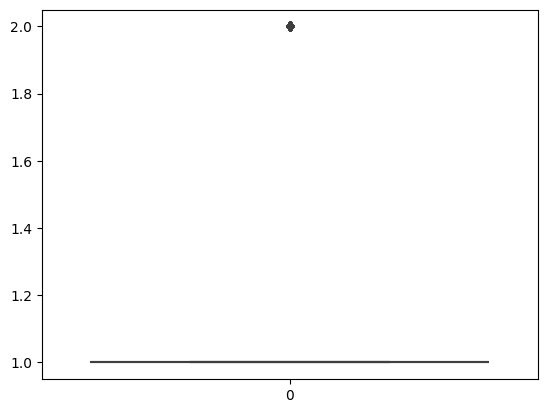

For Column: hearing(right)




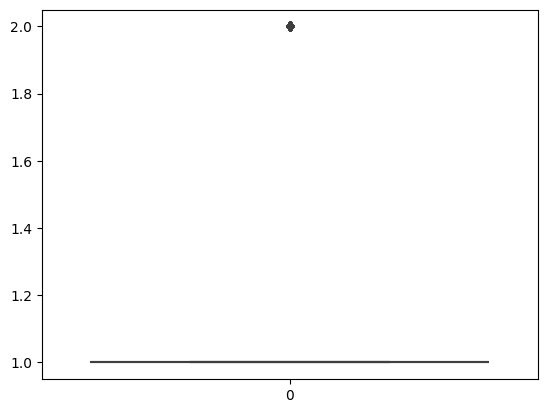

For Column: systolic




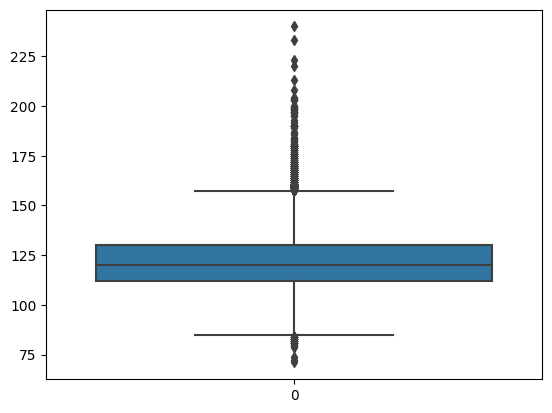

For Column: relaxation




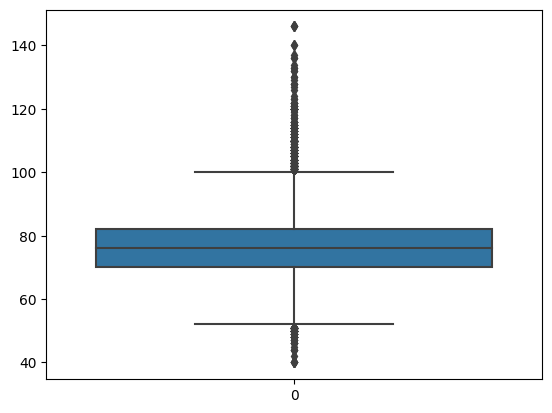

For Column: fasting blood sugar




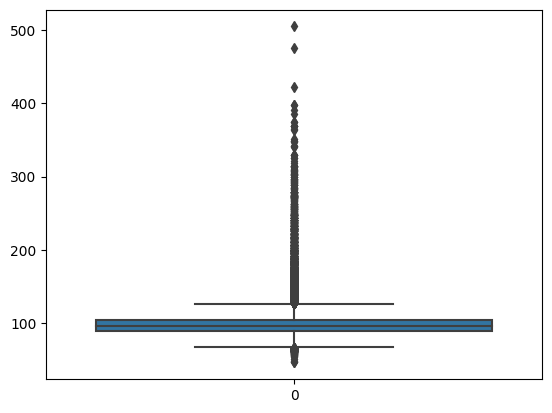

For Column: Cholesterol




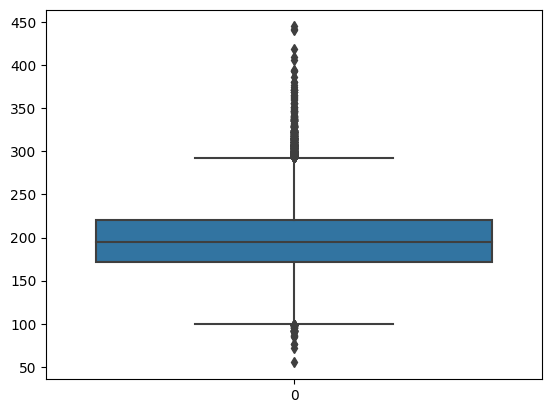

For Column: triglyceride




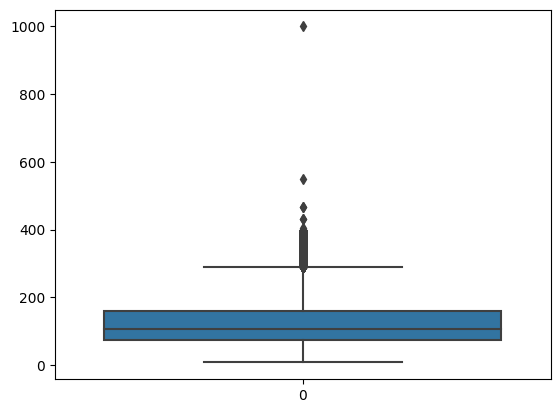

For Column: HDL




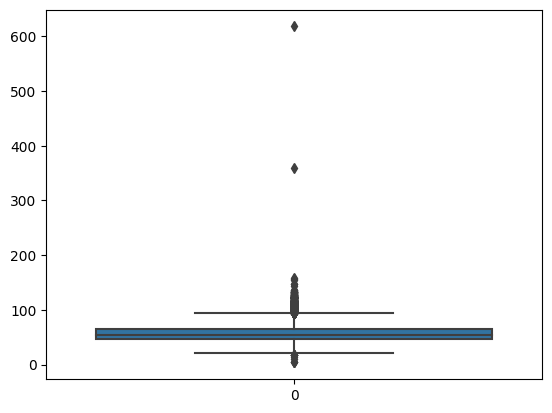

For Column: LDL




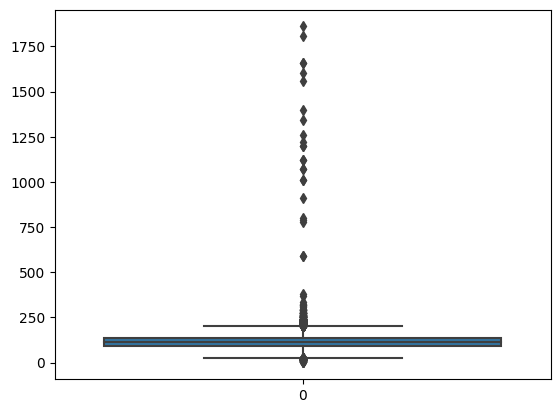

For Column: hemoglobin




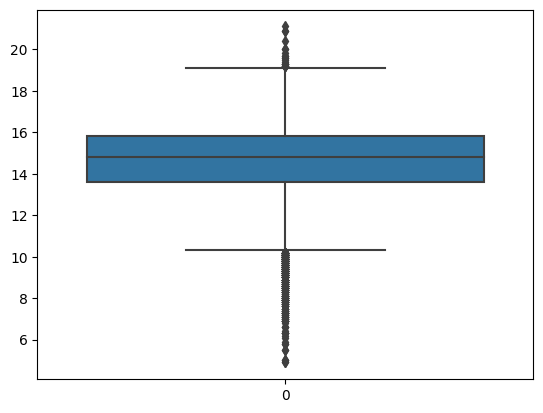

For Column: Urine protein




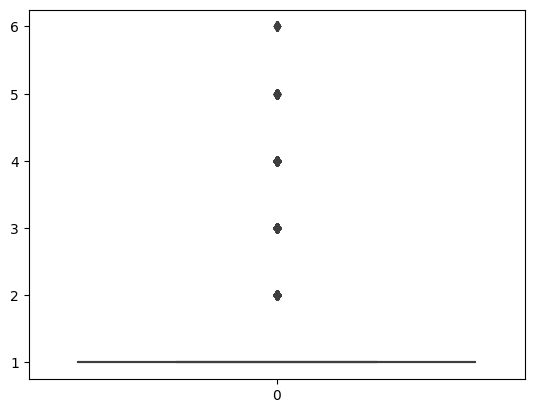

For Column: serum creatinine




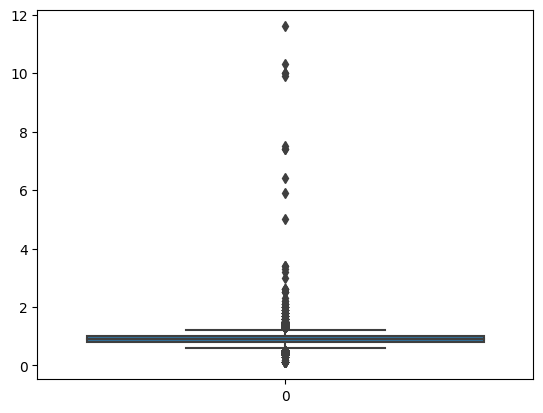

For Column: AST




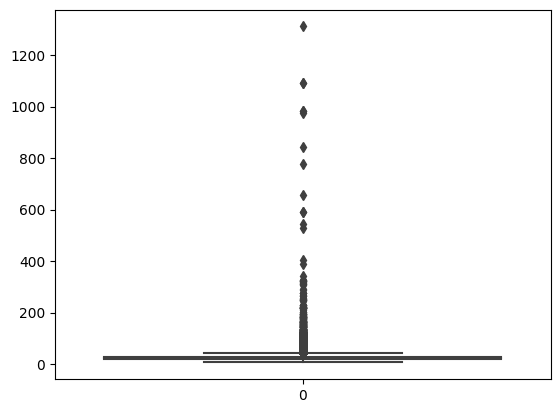

For Column: ALT




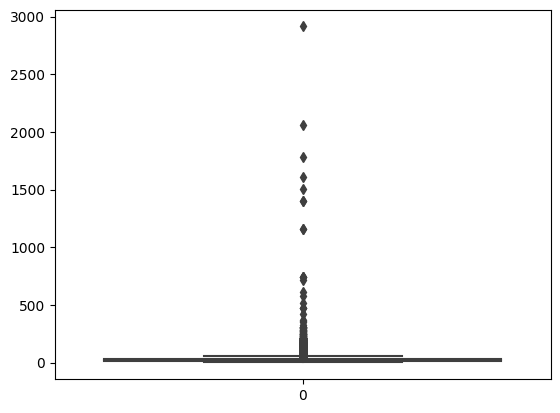

For Column: Gtp




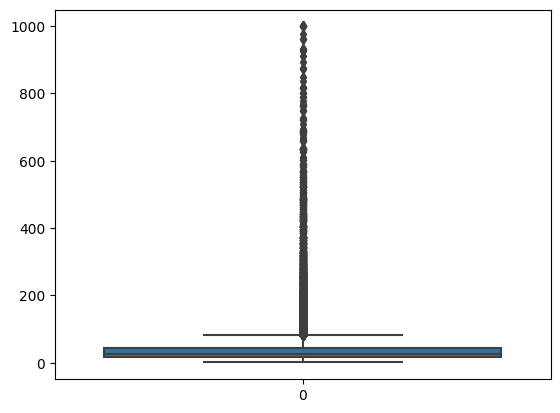

For Column: dental caries




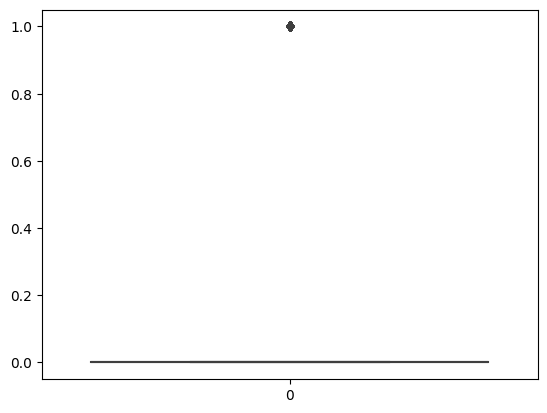

For Column: tartar




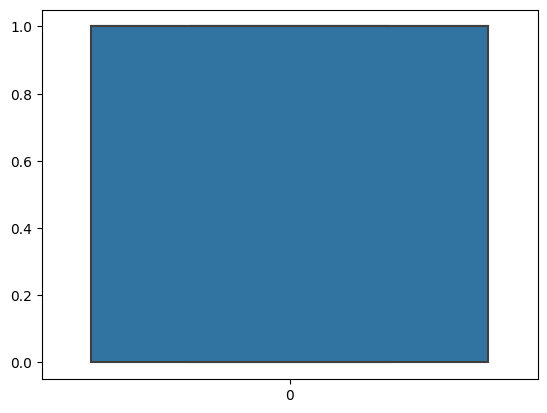

For Column: smoking




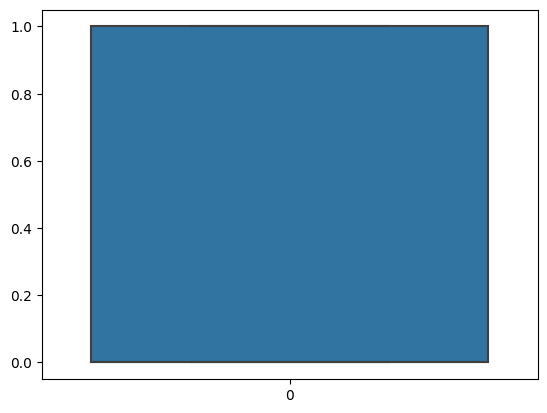

In [ ]:
for i in df.columns:
  if((df[i].dtypes== 'int64') or (df[i].dtype=='float64')):
    print('For Column:',i)
    sns.boxplot(df[i])
    print('\n')
    plt.show()


<Axes: xlabel='gender', ylabel='smoking'>

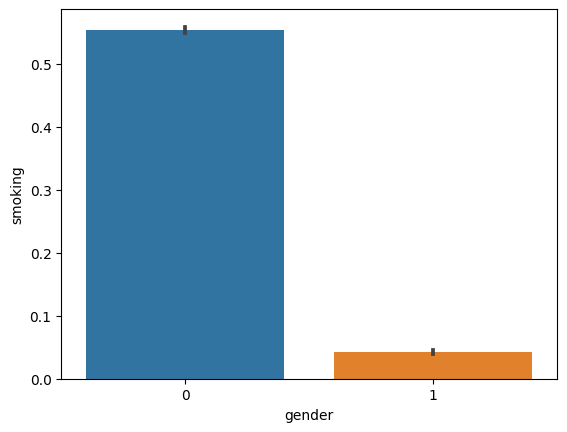

In [ ]:
#analysing the categorical columns
sns.barplot(x=df['gender'],y=df['smoking'])

IT SHOWS THAT MOST OF THE SMOKERS ARE MALE


<Axes: xlabel='smoking', ylabel='age'>

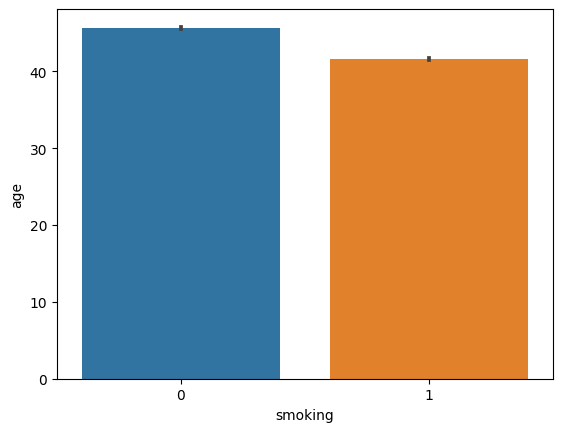

In [ ]:
#AGE VS SMOKERS
sns.barplot(x=df1['smoking'],y=df1['age'])

<Axes: xlabel='gender', ylabel='count'>

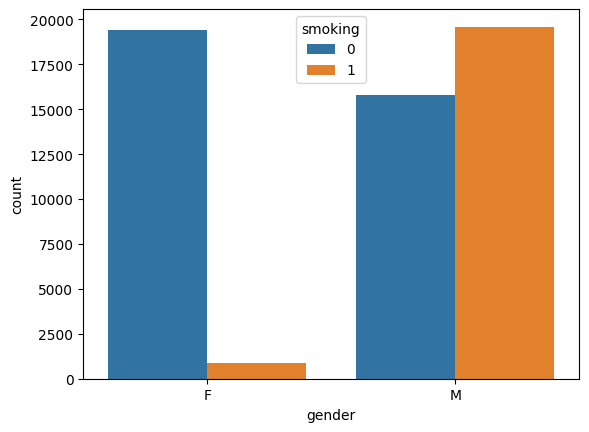

In [ ]:
#using countplot
sns.countplot(x=df1['gender'],hue=df1['smoking'])#here 0 represents male and 1 represents female

In [ ]:
df1

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


<Axes: ylabel='smoking'>

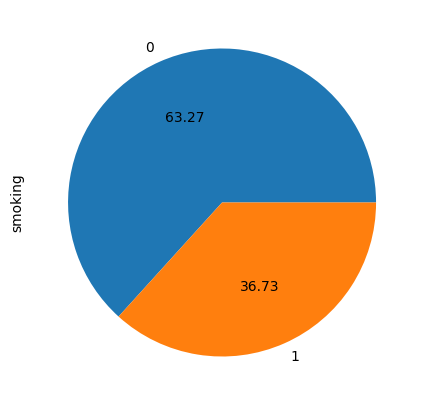

In [ ]:
#for verifying the percentage of smokers
plt.figure(figsize=(10,5))
df1.smoking.value_counts().plot.pie(autopct='%0.2f')

USING THIS PIECHART IT IS SEEN THAT 36.73% OF THE TOTAL POPULATION IN THE DATASET ARE SMOKERS

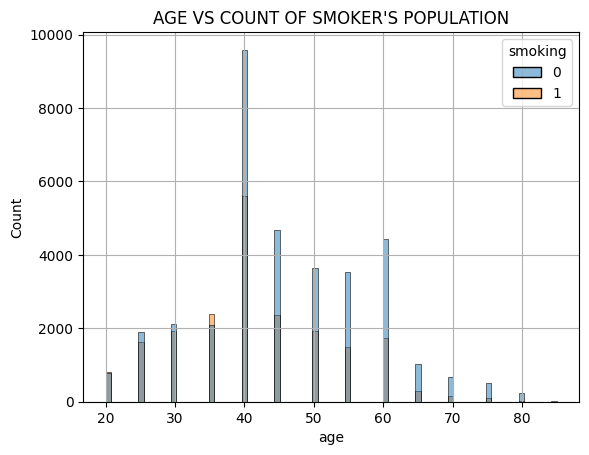

In [ ]:
#VERIFYING RANGE OF AGE FOR SMOKERS
sns.histplot(x=df['age'],hue=df['smoking'])
plt.title('AGE VS COUNT OF SMOKER\'S POPULATION')
plt.grid()
plt.show()

THIS BAR GRAPH SHOWS THAT OUT OF THE 36.73% SMOKERS IN THIS POPULATION, PEOPLE AT THE AGE OF 40 ARE THE HIGHEST OF ALL

 NOW FOR FEATURE SELECTION AMONG THE COLUNS USING FEATURE SELECTION

In [ ]:
x=df.iloc[:,:-1]
y=pd.DataFrame(df.smoking)
type(y)

pandas.core.frame.DataFrame

USING EXTRATREECLASSIFIER FOR FEATURE SELECCTION

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
e=ExtraTreesClassifier()

FITTING THE MODEL WITH RESPECT TO THE DATASET

In [ ]:
e.fit(x,y)

<ipython-input-171-ee8bc5414758>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  e.fit(x,y)


ExtraTreesClassifier()

In [ ]:
g=pd.Series(e.feature_importances_,index=x.columns).sort_values(ascending=False)

In [ ]:
#NOW VIEWING THE VALUES
g

gender                 0.178714
hemoglobin             0.061154
height(cm)             0.060361
Gtp                    0.057408
triglyceride           0.055274
waist(cm)              0.043862
age                    0.043669
weight(kg)             0.042429
HDL                    0.040758
ALT                    0.039623
fasting blood sugar    0.039374
serum creatinine       0.039306
LDL                    0.039264
systolic               0.039078
relaxation             0.038932
Cholesterol            0.038469
AST                    0.038311
eyesight(left)         0.035211
eyesight(right)        0.035067
Urine protein          0.009815
tartar                 0.009540
dental caries          0.008670
hearing(right)         0.002896
hearing(left)          0.002815
dtype: float64

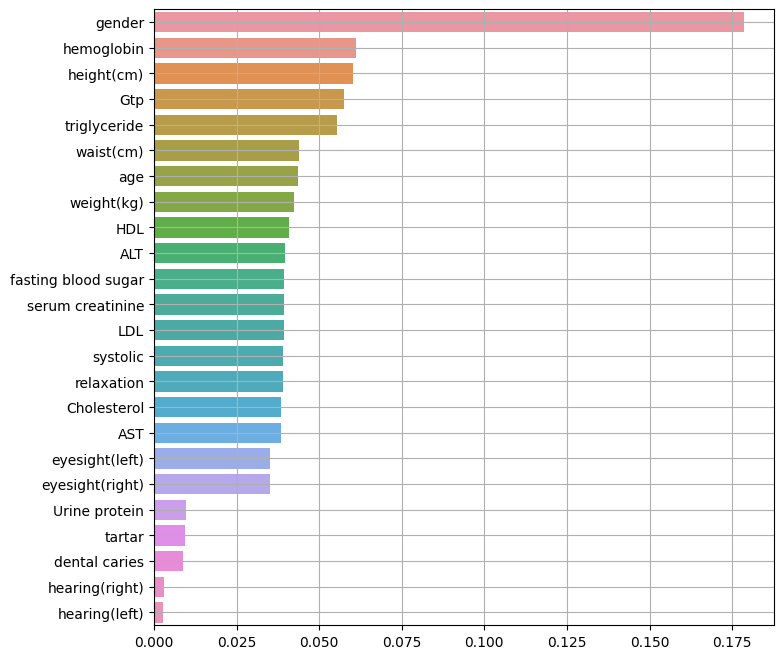

In [ ]:
#VIEWING THE VALUES IN THE GRAPHICAL REPRESENTATION
plt.figure(figsize=(8,8))
sns.barplot(x=g,y=g.index)
plt.grid()
plt.show()

In [ ]:
X=df[g.index[:14]]

In [ ]:
Y=df['smoking']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
f=LogisticRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
f.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=f.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      7027
           1       0.63      0.69      0.66      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.74      0.74      0.74     11139



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

73.53442858425352

DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
y_pred=d.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7017
           1       0.71      0.70      0.70      4122

    accuracy                           0.78     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.78      0.78      0.78     11139



In [ ]:
#using bagging algorithm
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(base_estimator=d,n_estimators=1000)

In [ ]:
bg.fit(x_train,y_train).score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8267348954125145

In [ ]:
y_pred=bg.predict(x_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      6793
           1       0.79      0.75      0.77      4346

    accuracy                           0.83     11139
   macro avg       0.82      0.81      0.82     11139
weighted avg       0.83      0.83      0.83     11139



BAGGING ALGORITHMS USING EXTRA TREES

In [ ]:
et=ExtraTreesClassifier(n_estimators=1000,random_state=42)
et.fit(x_train,y_train)
y_pred=et.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      6647
           1       0.82      0.75      0.78      4492

    accuracy                           0.83     11139
   macro avg       0.83      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



BAGGING ALGORITHM RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier(n_estimators=1000)

In [ ]:
r.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
y_pred=r.predict(x_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      6762
           1       0.80      0.75      0.78      4377

    accuracy                           0.83     11139
   macro avg       0.82      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139

